In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

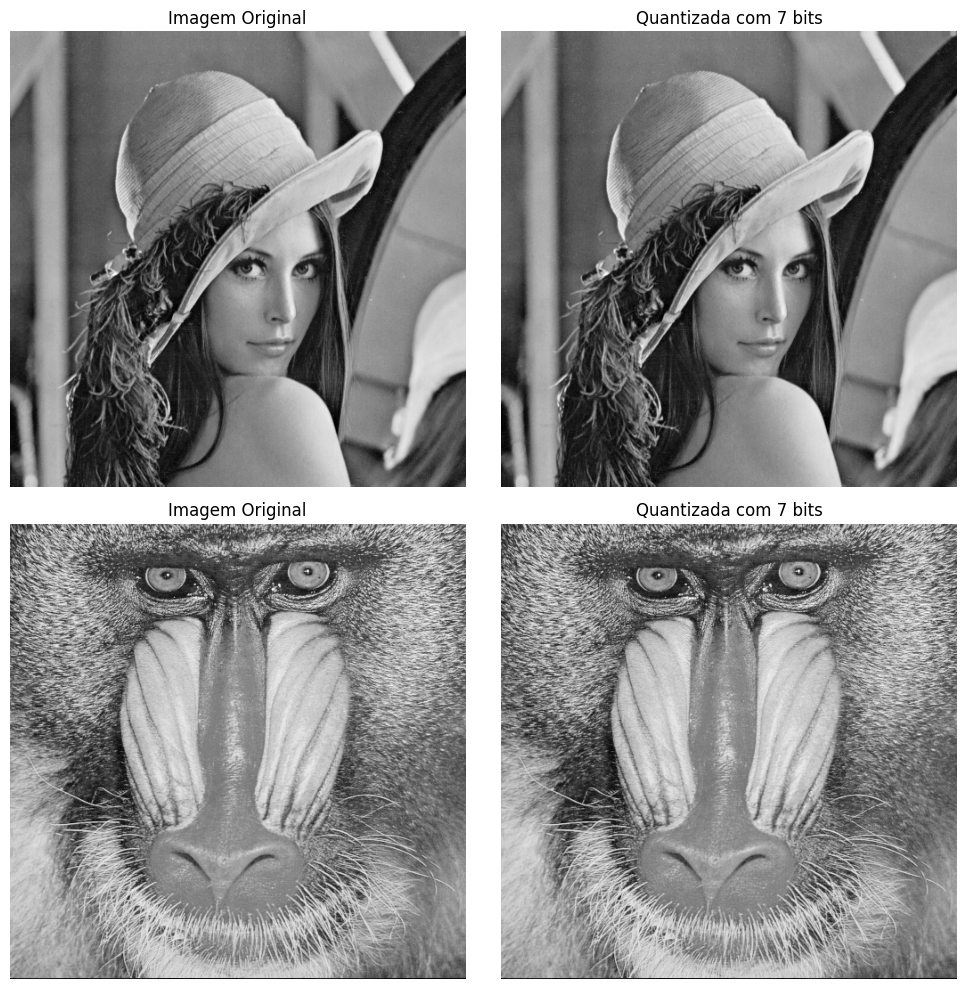

In [17]:
# Carrega a imagem em escala de cinza
img_1 = Image.open('lenna.tiff').convert('L') # (L = grayscale, 0-255) 
img_2 = Image.open('baboon.tiff').convert('L') # (L = grayscale, 0-255)
img_1_array = np.array(img_1)
img_2_array = np.array(img_2)

# Definir número de bits para quantização
nbits = 7

def image_quantization (img_array, nbits):

    img_array = img_array.astype(np.float32) # Converte a imagem para float32
    # Definir número de bits para quantização
    L = 2 ** nbits  # Níveis de quantização
    xmax = 255
    xmin = 0
    # Quantização: normalizar, escalar e arredondar
    """ img_array - xmin: normaliza a imagem subtraindo o valor mínimo
        (0 neste caso, já que a imagem está em [0, 255])
        (img_array - xmin) * (L - 1): escala os valores para o intervalo [0, L-1]
        L-1 é o número máximo de níveis de quantização
        / (xmax - xmin): normaliza os valores para o intervalo [0, 1]
        np.round(...): arredonda os valores para o inteiro mais próximo
    """
    q = np.round((img_array - xmin) * (L - 1) / (xmax - xmin))


    # Reconstrução: mapear os valores quantizados de volta para [0, 255]
    """
        (max -xmin) / (L - 1): calcula o tamanho de cada nivel de quantização no intervalo original
        + xmin: adiciona o valor mínimo (0 neste caso)
        np.uint8(...): converte os valores de volta para o tipo uint8
    """
    img_quantized = np.uint8(q * ((xmax - xmin) / (L - 1) + xmin))

    return img_quantized

img_1_quantized = image_quantization(img_1_array, nbits)
img_2_quantized = image_quantization(img_2_array, nbits)

# Exibição das imagens original e quantizada
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_1_array, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_1_quantized, cmap='gray')
plt.title(f'Quantizada com {nbits} bits')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_2_array, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_2_quantized, cmap='gray')
plt.title(f'Quantizada com {nbits} bits')
plt.axis('off')

plt.tight_layout()
plt.show()

## Quantização de Imagem
- **Objetivo:** Reduzir a quantidade de informação (bits) ao representar cada pixel, mapeando os valores contínuos ou com alta resolução para um conjunto discreto e menor de valores.
- **Processo:** 
  - **Normalização e Escalonamento:** O valor de cada pixel é normalizado (por exemplo, de 0 a 255) e escalado para o intervalo desejado, que depende do número de bits `nbits` (com \( L = 2^{\text{nbits}} \) níveis de quantização).
  - **Arredondamento:** Os valores são arredondados para o inteiro mais próximo, representando os níveis quantizados.
  - **Reconstrução:** Os valores quantizados são remapeados para o intervalo original (0 a 255), permitindo a comparação com a imagem original.

## Medidas de Distorção
Para avaliar a qualidade da quantização, utilizamos medidas que quantificam a diferença entre a imagem original e a quantizada:

- **Erro Quadrático Médio (MSE):**
  - Define a média dos erros ao quadrado entre os pixels correspondentes das duas imagens.
  - Uma MSE menor indica que a imagem quantizada está mais próxima da original.
  
- **Peak Signal-to-Noise Ratio (PSNR):**
  - Calculado a partir do MSE, o PSNR fornece uma medida logarítmica da qualidade da imagem reconstruída.
  - **Fórmula:**
  
    $$
    \text{PSNR} = 10 \cdot \log_{10}\left(\frac{255^2}{\text{MSE}}\right)
    $$
    
  - Valores maiores de PSNR indicam melhor qualidade da reconstrução (menos distorção).

## Teoria Rate-Distortion
- **Rate (Taxa):**
  - Em contextos de compressão, a taxa é o número de bits usados para representar cada pixel. Para imagens coloridas, se cada canal é quantizado com `nbits`, a taxa total por pixel é \( 3 \times \text{nbits} \) (considerando os canais R, G e B).
  
- **Distortion (Distorção):**
  - A distorção é medida pelo MSE ou, indiretamente, pelo PSNR. Quanto maior o MSE, maior a distorção e menor o PSNR.
  
- **Curva Rate-Distortion:**
  - Essa curva representa a relação entre a taxa de bits (quantidade de informação) e a distorção introduzida pela quantização.
  - À medida que a taxa aumenta (mais bits por pixel), a distorção diminui (MSE menor) e o PSNR aumenta, aproximando a imagem quantizada da original.
  - O objetivo é encontrar um equilíbrio entre compressão (redução da taxa) e qualidade (mínima distorção).


MSE para Lenna: [7086.8887, 608.66644, 114.505974, 23.723343, 5.8563232, 1.5259691, 0.5078621, 0.0]
MSE para Baboon: [7336.098, 581.86566, 111.97332, 24.06132, 5.9111824, 1.5346247, 0.50083286, 0.0]
PSNR para Lenna (dB): [9.626247503965201, 20.287010020714398, 27.542522163089238, 34.379044747094134, 40.45455321092157, 46.29534607803983, 51.07334564373168, inf]
PSNR para Baboon (dB): [9.476152280446543, 20.482576324913182, 27.63965805643322, 34.317609235983035, 40.4140600012513, 46.27078178111128, 51.13387549088486, inf]
Taxas (bits por pixel): [3, 6, 9, 12, 15, 18, 21, 24]


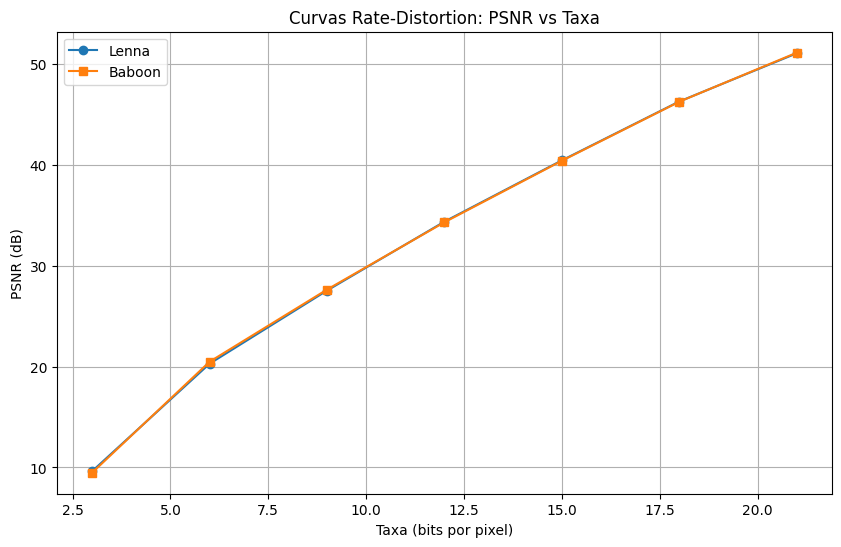

In [18]:
img_1_RGB_array = np.array(Image.open('lenna.tiff').convert('RGB'))
img_2_RGB_array = np.array(Image.open('baboon.tiff').convert('RGB'))

# Listas para armazenar os valores de MSE, PSNR e taxa (bits por pixel)
mse_img_1 = []
mse_img_2 = []
psnr_imag_1 = []
psnr_imag_2 = []
rates = []  # taxa total por pixel = 3 * nbits 

# Loop para variar o número de bits de 1 a 8 para cada canal
for nbits in range(1, 9):
    # Quantização para cada imagem
    img_lenna_q = image_quantization(img_1_RGB_array, nbits)
    img_baboon_q = image_quantization(img_2_RGB_array, nbits)
    
    # Cálculo do MSE para cada imagem (convertendo para float para evitar overflow)
    mse_l = np.mean((img_1_RGB_array.astype(np.float32) - img_lenna_q.astype(np.float32)) ** 2)
    mse_b = np.mean((img_2_RGB_array.astype(np.float32) - img_baboon_q.astype(np.float32)) ** 2)
    
    mse_img_1.append(mse_l)
    mse_img_2.append(mse_b)
    
    # Cálculo do PSNR (em dB)
    # Fórmula: PSNR = 10 * log10((255^2) / MSE)
    psnr_1 = 10 * np.log10((255**2) / mse_l) if mse_l != 0 else float('inf')
    psnr_2 = 10 * np.log10((255**2) / mse_b) if mse_b != 0 else float('inf')
    
    psnr_imag_1.append(psnr_1)
    psnr_imag_2.append(psnr_2)
    
    # Taxa total por pixel (3 canais)
    rates.append(3 * nbits)


# Exibir os valores calculados
print("MSE para Lenna:", mse_img_1)
print("MSE para Baboon:", mse_img_2)
print("PSNR para Lenna (dB):", psnr_imag_1)
print("PSNR para Baboon (dB):", psnr_imag_2)
print("Taxas (bits por pixel):", rates)

# Plotando as curvas Rate-Distortion (PSNR vs Taxa)
plt.figure(figsize=(10, 6))
plt.plot(rates, psnr_imag_1, marker='o', label='Lenna')
plt.plot(rates, psnr_imag_2, marker='s', label='Baboon')
plt.xlabel('Taxa (bits por pixel)')
plt.ylabel('PSNR (dB)')
plt.title('Curvas Rate-Distortion: PSNR vs Taxa')
plt.legend()
plt.grid(True)
plt.show()


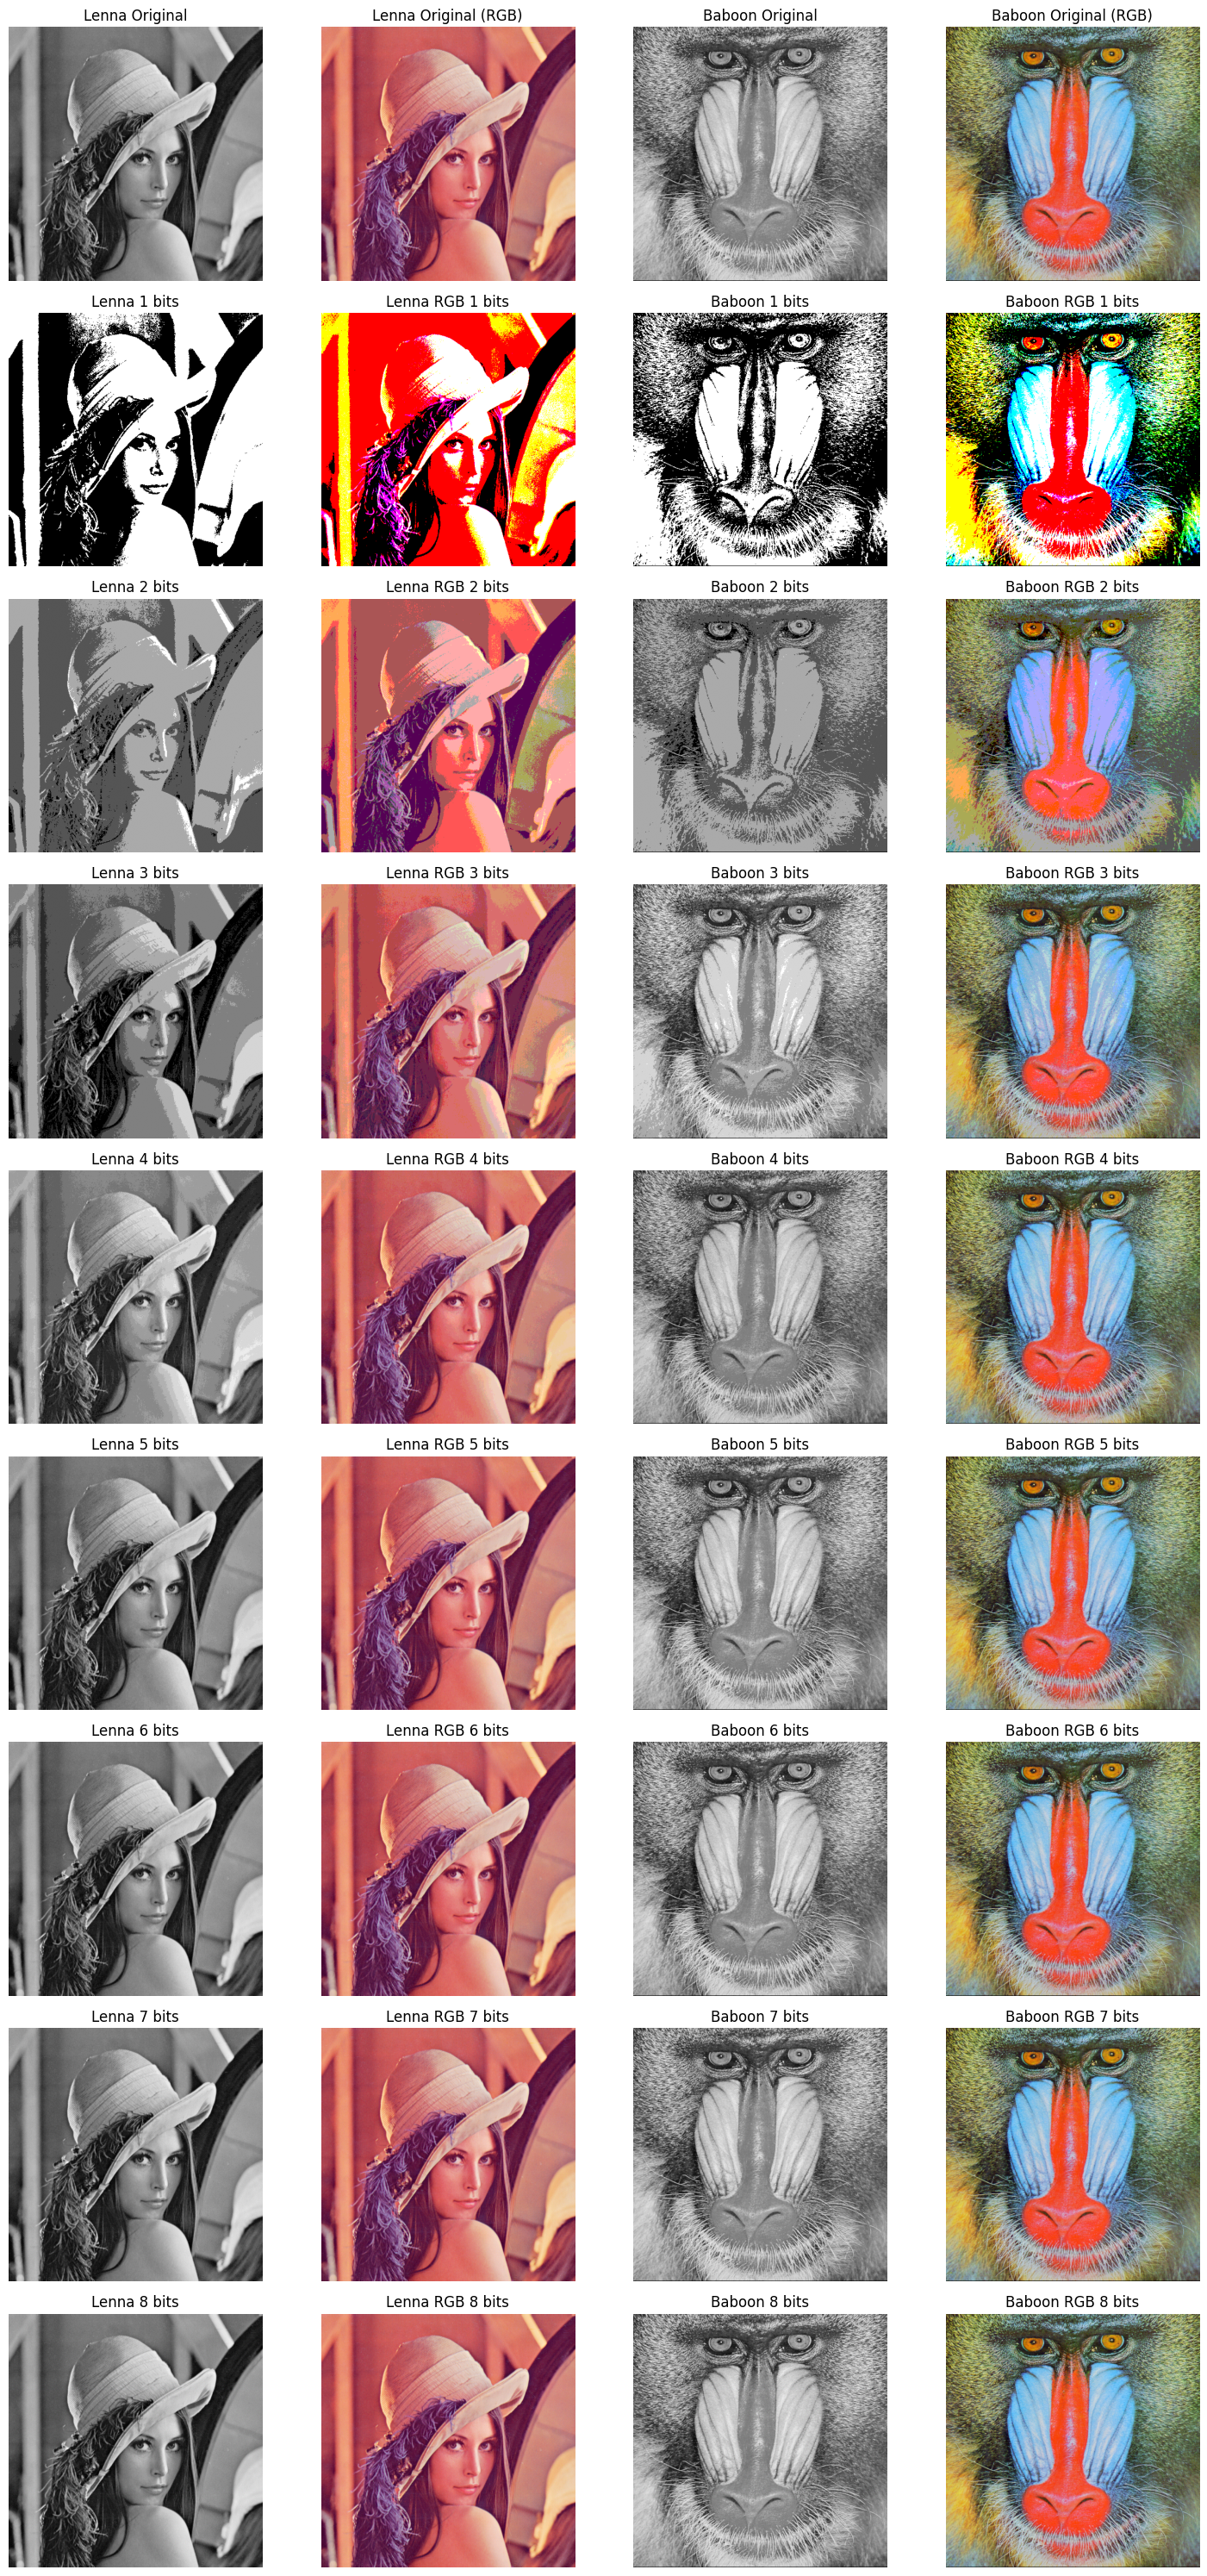

In [19]:

# Plotando um grid com as imagens originais e quantizadas para cada número de bits
fig, axes = plt.subplots(9, 4, figsize=(15, 30))

# Adicionando as imagens originais na primeira linha
axes[0, 0].imshow(img_1_array, cmap='gray')
axes[0, 0].set_title('Lenna Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_1_RGB_array)
axes[0, 1].set_title('Lenna Original (RGB)')
axes[0, 1].axis('off')

axes[0, 2].imshow(img_2_array, cmap='gray')
axes[0, 2].set_title('Baboon Original')
axes[0, 2].axis('off')

axes[0, 3].imshow(img_2_RGB_array)
axes[0, 3].set_title('Baboon Original (RGB)')
axes[0, 3].axis('off')

# Adicionando as imagens quantizadas para cada número de bits
for i, nbits in enumerate(range(1, 9)):
    img_lenna_q = image_quantization(img_1_array, nbits)
    img_lenna_rgb_q = image_quantization(img_1_RGB_array, nbits)
    img_baboon_q = image_quantization(img_2_array, nbits)
    img_baboon_rgb_q = image_quantization(img_2_RGB_array, nbits)

    axes[i + 1, 0].imshow(img_lenna_q, cmap='gray')
    axes[i + 1, 0].set_title(f'Lenna {nbits} bits')
    axes[i + 1, 0].axis('off')

    axes[i + 1, 1].imshow(img_lenna_rgb_q)
    axes[i + 1, 1].set_title(f'Lenna RGB {nbits} bits')
    axes[i + 1, 1].axis('off')

    axes[i + 1, 2].imshow(img_baboon_q, cmap='gray')
    axes[i + 1, 2].set_title(f'Baboon {nbits} bits')
    axes[i + 1, 2].axis('off')

    axes[i + 1, 3].imshow(img_baboon_rgb_q)
    axes[i + 1, 3].set_title(f'Baboon RGB {nbits} bits')
    axes[i + 1, 3].axis('off')

plt.tight_layout()
plt.show()


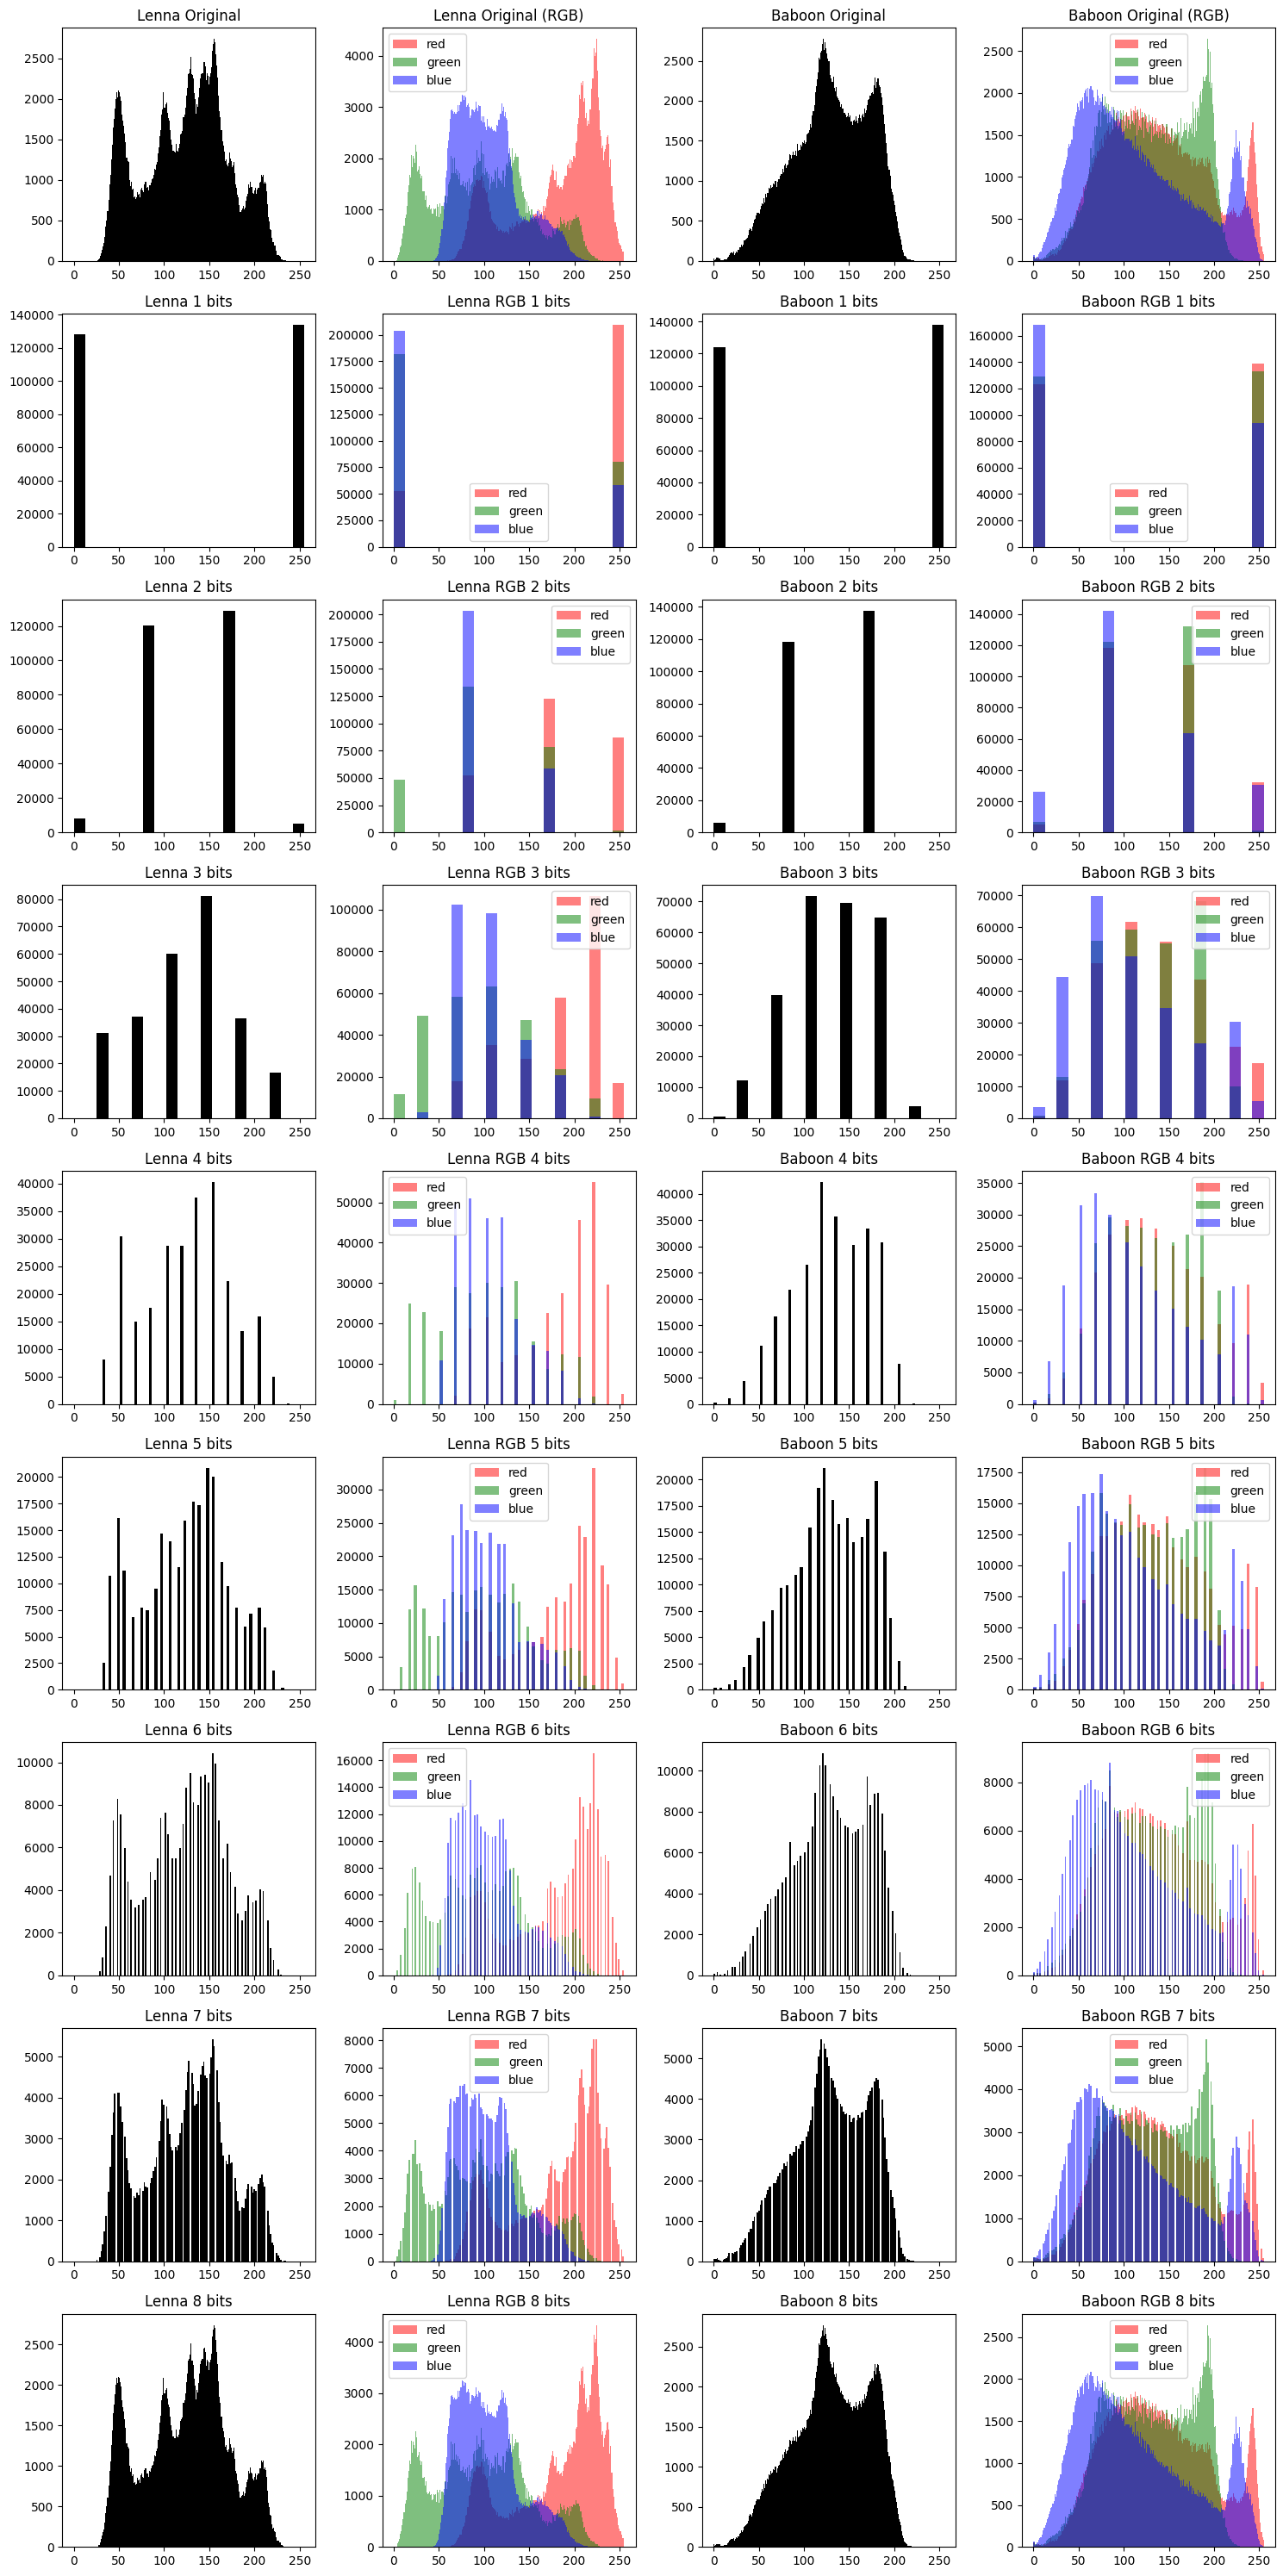

In [20]:
# Plotando um grid com os histogramas das imagens originais e quantizadas
fig, axes = plt.subplots(9, 4, figsize=(15, 30))

# Função auxiliar para plotar histograma
def plot_hist(ax, img_array, title, nbins, color='black'):
    if img_array.ndim == 3:
        # Histograma para cada cor
        colors = ['red', 'green', 'blue']
        for i, c in enumerate(colors):
            ax.hist(img_array[:, :, i].ravel(), bins=nbins, range=(0, 255), color=c, alpha=0.5, label=c)
        ax.legend()
    else:
        # Imagem em escala de cinza
        ax.hist(img_array.ravel(), bins=nbins, range=(0, 255), color=color)

    ax.set_title(title)

# Histogramas das imagens originais (cinza e RGB)
plot_hist(axes[0, 0], img_1_array, 'Lenna Original', 255)
plot_hist(axes[0, 1], img_1_RGB_array, 'Lenna Original (RGB)', 255)
plot_hist(axes[0, 2], img_2_array, 'Baboon Original', 255)
plot_hist(axes[0, 3], img_2_RGB_array, 'Baboon Original (RGB)', 255)

# Histogramas das imagens quantizadas (cinza e RGB)
for i, nbits in enumerate(range(1, 9)):
    img_lenna_q = image_quantization(img_1_array, nbits)
    img_lenna_rgb_q = image_quantization(img_1_RGB_array, nbits)
    img_baboon_q = image_quantization(img_2_array, nbits)
    img_baboon_rgb_q = image_quantization(img_2_RGB_array, nbits)

    # Ajustes para o plot das barras ficar visivelmente bonito
    if i <= 2:
        nbins = 20
    elif i <= 4:
        nbins = 80
    elif i<= 6:
        nbins = 155
    else:
        nbins = 255

    # Plot dos histogramas
    plot_hist(axes[i + 1, 0], img_lenna_q, f'Lenna {nbits} bits', nbins)
    plot_hist(axes[i + 1, 1], img_lenna_rgb_q, f'Lenna RGB {nbits} bits', nbins)
    plot_hist(axes[i + 1, 2], img_baboon_q, f'Baboon {nbits} bits', nbins)
    plot_hist(axes[i + 1, 3], img_baboon_rgb_q, f'Baboon RGB {nbits} bits', nbins)

plt.tight_layout()
plt.show()

## Quantizadores Usados

- **Caso nbits 1:**
    - **Níveis de Quantização:** [0, 255]
    - **Thresholds de Decisão:** [0, 127.5), [127.5, 255]

- **Caso nbits 2:**
    - **Níveis de Quantização:** [0, 85, 170, 255]
    - **Thresholds de Decisão:** [0, 42.5), [42.5, 127.5), [127.5, 212.5), [212.5, 255]

- **Caso nbits 3:**
    - **Níveis de Quantização:** [0, 36.43, 72.86, 109.29, 145.71, 182.14, 218.57, 255]
    - **Thresholds de Decisão:** [0, 18.22), [18.22, 54.64), [54.64, 91.07), [91.07, 127.5), [127.5, 163.93), [163.93, 200.36), [200.36, 236.79), [236.79, 255]